In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

%matplotlib inline

In [2]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    fnyq = 0.5 * fs
    low = lowcut / fnyq
    high = highcut / fnyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def filter(data, lowcut=6, highcut=28, fs=128, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [3]:

#channel = [5,6,7,8,9,13]
#channel = ['ch5', 'ch6', 'ch7', 'ch8', 'ch9','ch13']
# channel = ['ch0', 'ch1', 'ch2', 'ch3', 'ch4','ch5', 'ch6', 'ch7', 'ch8', 'ch9','ch10','ch11','ch12','ch13']
channel=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

In [4]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y
# low pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [5]:
def welch_graphs (df):
    """ 
       df of one trail only 

    """
    
    freq = df['Label'].iloc[0]

    df = df.drop(columns='Label')
    ig, axis = plt.subplots(int(len(channel)/2),2,figsize=(20,20))
    ig.suptitle('frequency:{}'.format(freq))
    
    xcoords = [7.50,8.57,10,12]
    # colors for the lines
    colors = ['g','r','g','r']


    for i,ch in  enumerate(channel):
       
        # calculate welch for each channel
#         y = filter(df[ch])
        y = butter_lowpass_filter(df[ch],40,128)
        y = butter_highpass_filter(y,5,128)
        f, Pxx_den = signal.welch(y,fs=128,nfft=5*128)
        f=f[:-80]
        Pxx_den=Pxx_den[:-80]
        for xc,c in zip(xcoords,colors):
            axis[i%7,int(i>=7)].axvline(x=xc, label='line at x = {}'.format(xc), c=c)
        axis[i%7,int(i>=7)].plot(f,Pxx_den)
        axis[i%7,int(i>=7)].set_title(channel[i])
        axis[i%7,int(i>=7)].grid(True)
        
    plt.title
    plt.show()

In [6]:
def time_vis(df):
    """ 
        input: dataframe for one trial
        output: figure 
    """
    df = df.drop(columns='Label')
    plt.figure(figsize=(10,7))
    plt.plot(df+ 80*np.arange(13,-1,-1))
    plt.yticks([])
    plt.axis('tight')
    plt.legend(channel)
    #plt.legend(channels_name)
    plt.show()
    

In [7]:

# take whole file
def commen_avg_noise(trails_s):
        for i in range(len(trails_s)):
            trails_s[i] = trails_s[i] - np.mean(trails_s[i], axis=0)
        return trails_s

In [8]:
def CAR(Data):
  mean = Data.mean(axis=1)
  for i in Data.columns:
    Data[i]=Data[i] - mean
  return Data

In [9]:
period = 5
full_path = 'D:\Graduation Project\BCInterface\BCInterface\Headset'

df = pd.read_csv('girgis_10.csv')



In [10]:
label = df['Label']
df_new = df.drop(columns='Label')
df_new = CAR(df_new)
df_new ['Label']=label.values


In [11]:
# t2sem l file l df according l trail number
file_len = df_new.shape[0]
samples = period*128
number_of_trail = int(file_len/samples)
number_of_trail


10

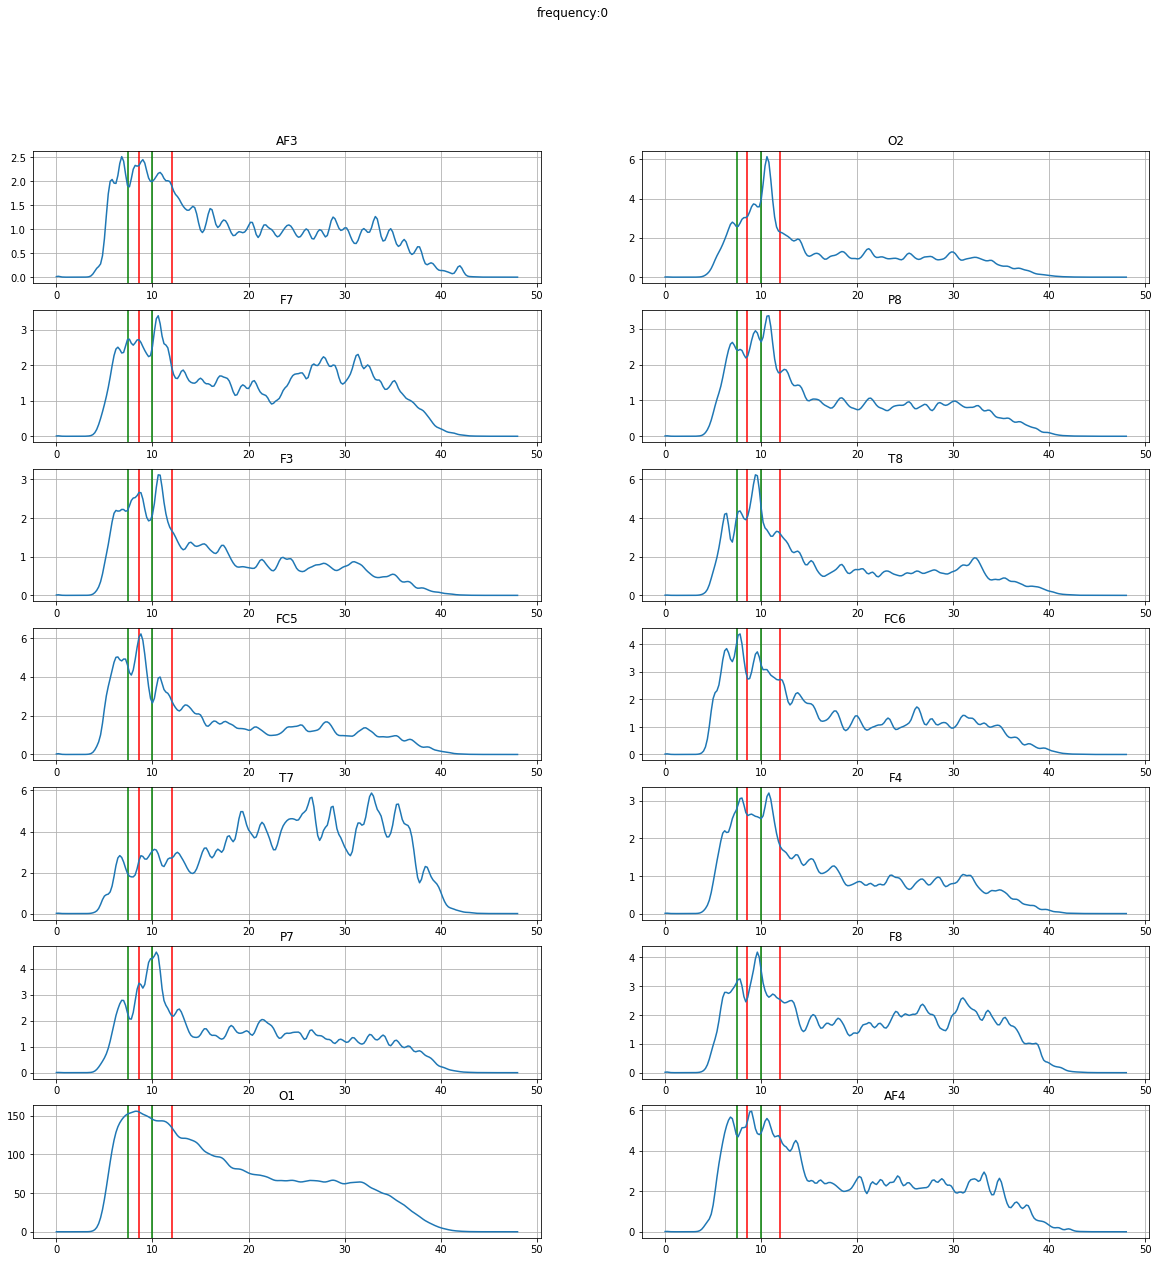

In [15]:

trail_num = 0
df_tem= df_new.iloc[trail_num*samples:(trail_num+1)*samples,:]
welch_graphs(df_new)


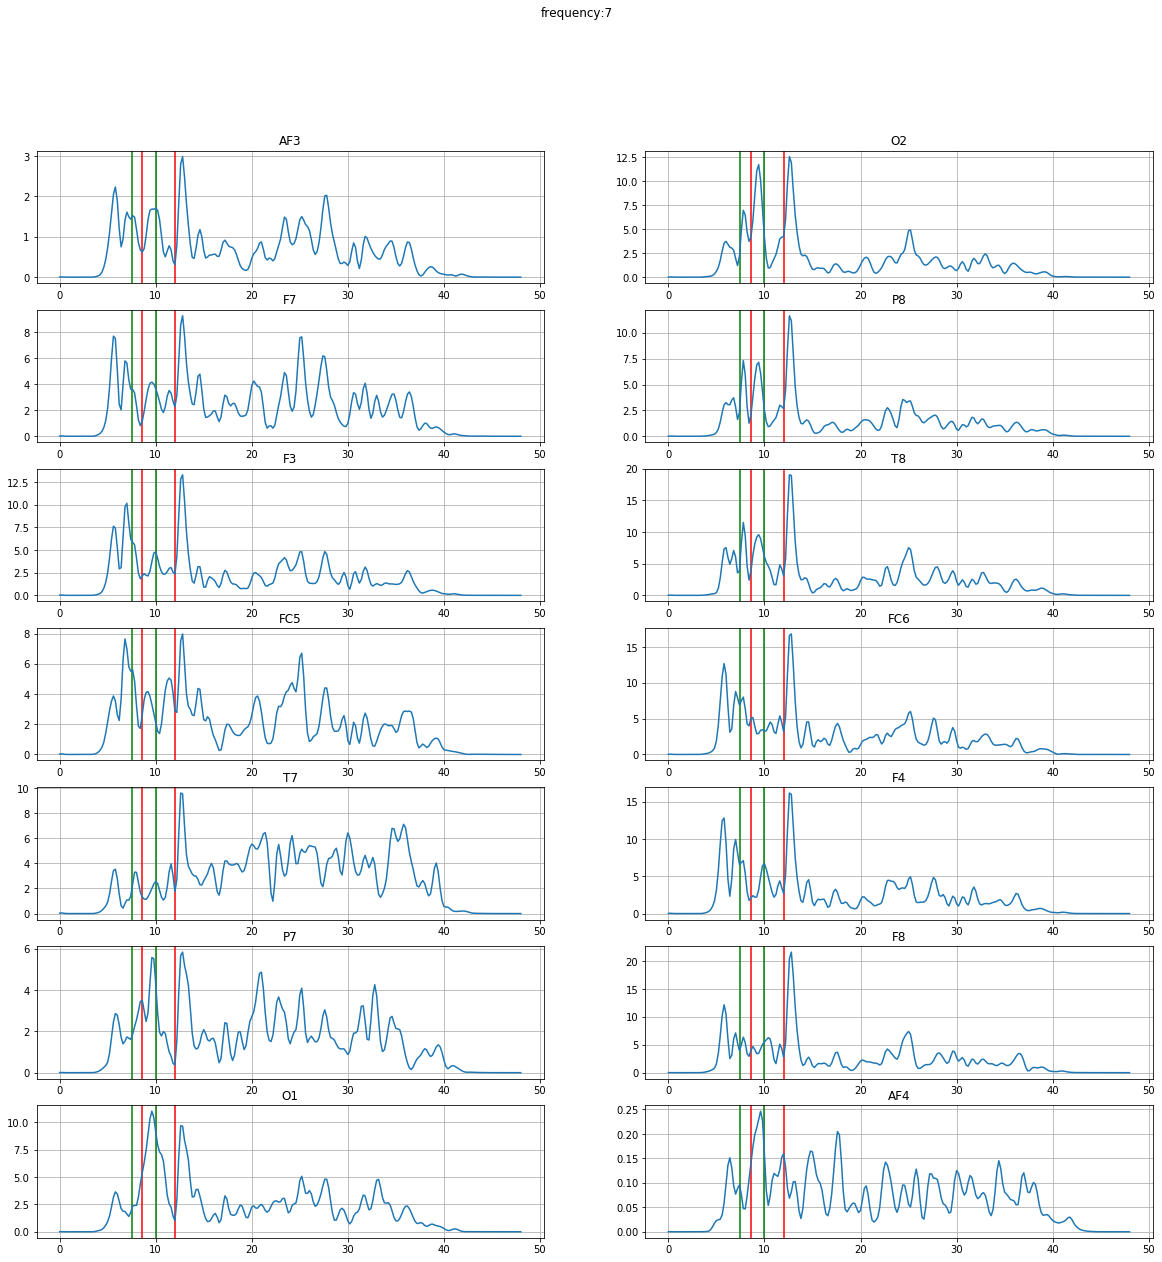

In [29]:
trail_num =7
df_tem= df.iloc[trail_num*samples:(trail_num+1)*samples,:]
welch_graphs(df_tem)

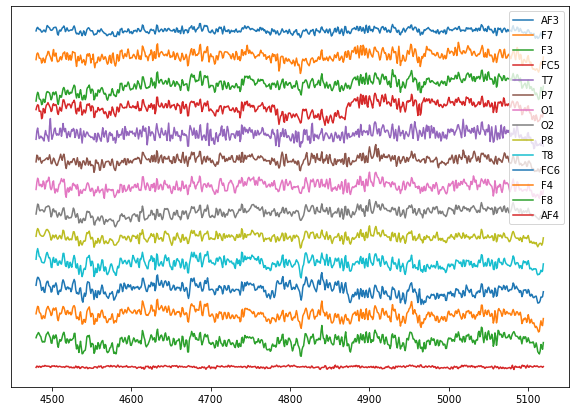

In [30]:
time_vis(df_tem)